# "Comprehensive Analysis of COVID-19 in India: Trends, Impacts, and Vaccination Insights"

# *Objective:*
Analyze COVID-19 trends across Indian states and cities.
Examine vaccination rollout and its impact on case reduction.
Predict growth in confirmed cases and evaluate recovery and mortality rates.


# *Introduction:*

The COVID-19 pandemic has had a profound impact on India, requiring meticulous tracking and analysis to understand its spread and the effectiveness of interventions. This project examines state-wise COVID-19 data across India, focusing on metrics such as confirmed cases, active cases, recoveries, deaths, vaccination rates, and testing rates. The dataset reflects both consistent and inconsistent entries, providing an opportunity to clean, standardize, and analyze the data for actionable insights. By examining key trends and relationships between variables, this analysis aims to highlight regional disparities, evaluate the success of public health interventions, and identify areas for future improvement in pandemic response.

# *Data Sources*
The dataset contains COVID-19-related statistics for various Indian states and cities, including:


* Date: The date of data collection (format: DD-MM-YYYY).
* State: Indian state where the data was collected.
* City: Specific city within the state.
* Confirmed_Cases: Total number of confirmed COVID-19 cases.
* Active_Cases: Number of active cases at the time of data collection
* Recovered_Cases: Number of recovered cases at the time of data collection.
* Deaths: Total number of deaths caused by COVID-19.
* Population: Population of the respective city/state.
* Vaccination_Rate: Vaccination percentage (in %).
* Testing_Rate: Testing percentage (in %).


# *Python code for creating CSV file with data*

In [2]:
import csv

data = {
    "Date": [
        "2023-05-15", "15/05/2023", "2023/05/16", "2023-05-17", "17-05-2023",
        "2023-05-18", None, "05/19/2023", "19-05-2023", "2023-05-20",
        "2022-02-03", None, "2023-06-16", "2022-11-07", "2023-08-19"
    ],
    "State": [
        "Maharashtra", "Karnataka", "Tamil Nadu", "Delhi", "Uttar Pradesh",
        "West Bengal", "Gujarat", "Rajasthan", "Kerala", "Maharashtra",
        "Telangana", "Rajasthan", None, "Haryana", None
    ],
    "City": [
        "Pune", "Bangalore", "Chennai", "New Delhi", "Lucknow",
        None, "Ahmedabad", "Jaipur", "Kochi", None,
        "Hyderabad", None, "Jaipur", "Gurugram", "Kolkata"
    ],
    "Confirmed_Cases": [
        18792, 12981, None, 808650, 950800,
        75600, 90800, 85600, 72530, 987000,
        98520, 97820, None, 39525, None
    ],
    "Active_Cases": [
        20821, None, 10250, 15250, 50200,
        25828, 20610, None, 15940, 19690,
        None, None, None, None, None
    ],
    "Recovered_Cases": [
        75002, 10981, 75368, 62452, None,
        54584, 65723, 75469, 52155, 75782,
        None, 89522, 42169, 45622, 58760
    ],
    "Deaths": [
        5280, 3548, None, 1750, 3891,
        1548, 1970, 850, 3546, None,
        781, None, 2356, 6987, 7844
    ],
    "Population": [
        112374333, 61095297, 72147030, 16787941, 199812341,
        None, 60439692, 68548437, 33406061, 112374333,
        516613212, 45155224, None, 324511124, 18756220022
    ],
    "Vaccination_Rate": [
        70, 65, None, 85, 80,
        75, None, 78, 88, 85,
        78, 91, 81, 68, 76
    ],
    "Testing_Rate": [
        80, None, 70, 90, 85,
        75, 88, None, 78, 85,
        69, 82, 75, 87, 67
    ],
}

with open("Covid19cases.csv", "w", newline="") as file:
    writer = csv.writer(file)
    
    writer.writerow(data.keys())

    writer.writerows(zip(*data.values()))

print("CSV file 'Covid19cases.csv' created successfully.")

CSV file 'Covid19cases.csv' created successfully.


# *Using Python (Pandas ans SQLAlchemy) to create database*

In [2]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

# Created a new SQLite database (file will be created locally)
engine = create_engine('sqlite:///covid19_cases.db')

file_path = '/kaggle/input/covid19cases/Covid19cases.csv'  
df = pd.read_csv(file_path)

print("Table 'sales' has been created in SQLite database.")

df.head()

Table 'sales' has been created in SQLite database.


,Date,State,City,Confirmed_Cases,Active_Cases,Recovered_Cases,Deaths,Population,Vaccination_Rate,Testing_Rate
0,2023-05-15,Maharashtra,Pune,18792.0,20821.0,75002.0,5280.0,112374333.0,70.0,80.0
1,15/05/2023,Karnataka,Bangalore,12981.0,NaN,10981.0,3548.0,61095297.0,65.0,NaN
2,2023/05/16,Tamil Nadu,Chennai,NaN,10250.0,75368.0,NaN,72147030.0,NaN,70.0
3,2023-05-17,Delhi,New Delhi,808650.0,15250.0,62452.0,1750.0,16787941.0,85.0,90.0
4,17-05-2023,Uttar Pradesh,Lucknow,950800.0,50200.0,NaN,3891.0,199812341.0,80.0,85.0


In [4]:
#Step 1: Install ipython-sql
!pip install ipython-sql

In [7]:
#Load the sql extension in Jupyter
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [10]:
#Connect to the SQLite database
%sql
%sql sqlite:///covid19_cases.db

 * sqlite:///covid19_cases.db


# *Data Analysis and Cleaning*

In [11]:
#Handle Missing Values
## Fill numeric columns with median values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical columns with "Unknown"
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

print("\nDataset after handling missing values:")
print(df)


Dataset after handling missing values:
          Date          State       City  Confirmed_Cases  Active_Cases  \
0   2023-05-15    Maharashtra       Pune          18792.0       20821.0   
1   15/05/2023      Karnataka  Bangalore          12981.0       20150.0   
2   2023/05/16     Tamil Nadu    Chennai          88200.0       10250.0   
3   2023-05-17          Delhi  New Delhi         808650.0       15250.0   
4   17-05-2023  Uttar Pradesh    Lucknow         950800.0       50200.0   
5   2023-05-18    West Bengal    Unknown          75600.0       25828.0   
6      Unknown        Gujarat  Ahmedabad          90800.0       20610.0   
7   05/19/2023      Rajasthan     Jaipur          85600.0       20150.0   
8   19-05-2023         Kerala      Kochi          72530.0       15940.0   
9   2023-05-20    Maharashtra    Unknown         987000.0       19690.0   
10  2022-02-03      Telangana  Hyderabad          98520.0       20150.0   
11     Unknown      Rajasthan    Unknown          97820.0   

In [12]:
#Standardize Formats
##Standardize text in State column
df["State"] = df["State"].str.title().str.strip()

df["City"] = df["City"].str.title().str.strip()

# Check and handle the 'District' column
if "City" not in df.columns:
    print("'City' column not found. Creating an empty column.")
    df["City"] = None  # Create empty column

# Standardize text in City column
df["City"] = df["City"].str.title().str.strip()


print("\nDataset after standardizing formats:")
print(df)


Dataset after standardizing formats:
          Date          State       City  Confirmed_Cases  Active_Cases  \
0   2023-05-15    Maharashtra       Pune          18792.0       20821.0   
1   15/05/2023      Karnataka  Bangalore          12981.0       20150.0   
2   2023/05/16     Tamil Nadu    Chennai          88200.0       10250.0   
3   2023-05-17          Delhi  New Delhi         808650.0       15250.0   
4   17-05-2023  Uttar Pradesh    Lucknow         950800.0       50200.0   
5   2023-05-18    West Bengal    Unknown          75600.0       25828.0   
6      Unknown        Gujarat  Ahmedabad          90800.0       20610.0   
7   05/19/2023      Rajasthan     Jaipur          85600.0       20150.0   
8   19-05-2023         Kerala      Kochi          72530.0       15940.0   
9   2023-05-20    Maharashtra    Unknown         987000.0       19690.0   
10  2022-02-03      Telangana  Hyderabad          98520.0       20150.0   
11     Unknown      Rajasthan    Unknown          97820.0     

In [13]:
#Remove Duplicates
##Drop duplicate rows

df = df.drop_duplicates()
print("\nDataset after removing duplicates:")
print(df)


Dataset after removing duplicates:
          Date          State       City  Confirmed_Cases  Active_Cases  \
0   2023-05-15    Maharashtra       Pune          18792.0       20821.0   
1   15/05/2023      Karnataka  Bangalore          12981.0       20150.0   
2   2023/05/16     Tamil Nadu    Chennai          88200.0       10250.0   
3   2023-05-17          Delhi  New Delhi         808650.0       15250.0   
4   17-05-2023  Uttar Pradesh    Lucknow         950800.0       50200.0   
5   2023-05-18    West Bengal    Unknown          75600.0       25828.0   
6      Unknown        Gujarat  Ahmedabad          90800.0       20610.0   
7   05/19/2023      Rajasthan     Jaipur          85600.0       20150.0   
8   19-05-2023         Kerala      Kochi          72530.0       15940.0   
9   2023-05-20    Maharashtra    Unknown         987000.0       19690.0   
10  2022-02-03      Telangana  Hyderabad          98520.0       20150.0   
11     Unknown      Rajasthan    Unknown          97820.0       

# *Exploratory Data Analysis (EDA)*

In [14]:
#Descriptive Statistics
##Total cases, recoveries, deaths, vaccination rates:

print(df[['Confirmed_Cases', 'Active_Cases', 'Recovered_Cases', 'Deaths']].describe())

       Confirmed_Cases  Active_Cases  Recovered_Cases       Deaths
count        15.000000     15.000000        15.000000    15.000000
mean     240214.533333  21309.266667     60566.200000  3280.266667
std      352319.216771   8683.733714     18683.596297  2061.086207
min       12981.000000  10250.000000     10981.000000   781.000000
25%       74065.000000  19920.000000     53369.500000  1860.000000
50%       88200.000000  20150.000000     62452.000000  2951.000000
75%       98170.000000  20380.000000     75185.000000  3719.500000
max      987000.000000  50200.000000     89522.000000  7844.000000


In [15]:
#Total Cases Across Regions:

total_cases_by_state = df.groupby('State')['Confirmed_Cases'].sum()
print(total_cases_by_state)

State
Delhi             808650.0
Gujarat            90800.0
Haryana            39525.0
Karnataka          12981.0
Kerala             72530.0
Maharashtra      1005792.0
Rajasthan         183420.0
Tamil Nadu         88200.0
Telangana          98520.0
Unknown           176400.0
Uttar Pradesh     950800.0
West Bengal        75600.0
Name: Confirmed_Cases, dtype: float64


<Axes: title={'center': 'COVID-19 Trends Over Time'}, xlabel='Date'>

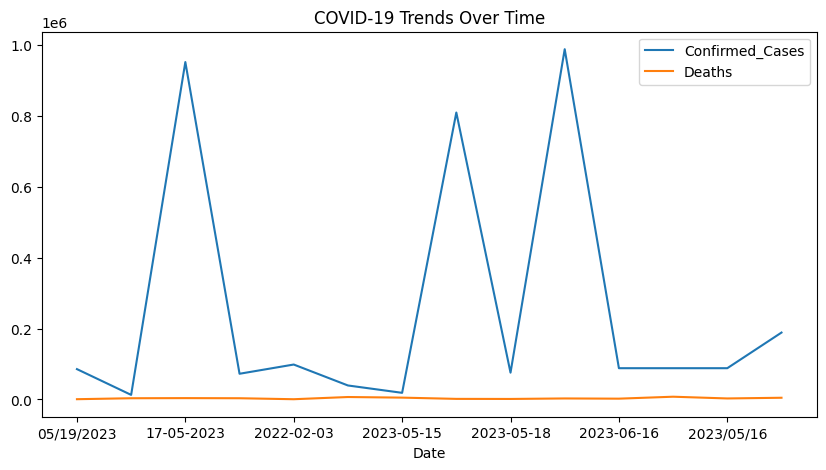

In [16]:
#Trend Analysis
##Cases and deaths over time

daily_trends = df.groupby('Date').sum()
daily_trends[['Confirmed_Cases', 'Deaths']].plot(title="COVID-19 Trends Over Time",figsize=(10, 5))

<Axes: title={'center': 'Daily Confirmed Cases'}, xlabel='Date'>

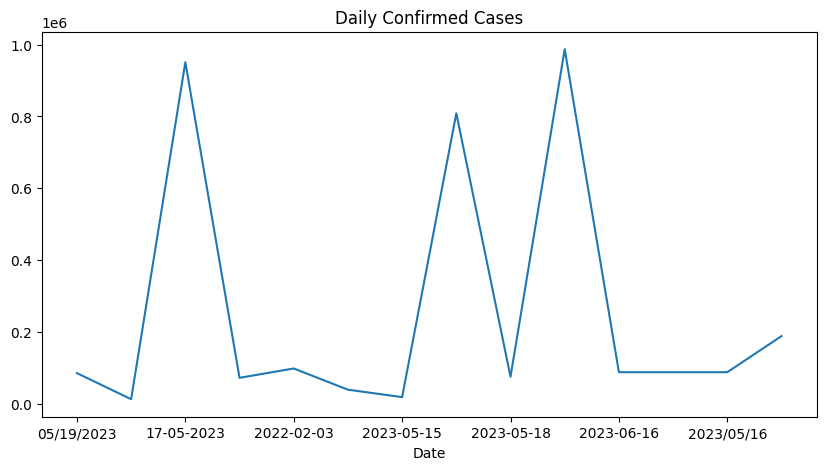

In [55]:
#Trend Analysis
##Plot Daily/Weekly/Monthly Trends: Aggregate data by date:

daily_trends = df.groupby('Date').sum()
daily_trends['Confirmed_Cases'].plot(title="Daily Confirmed Cases", figsize=(10, 5))

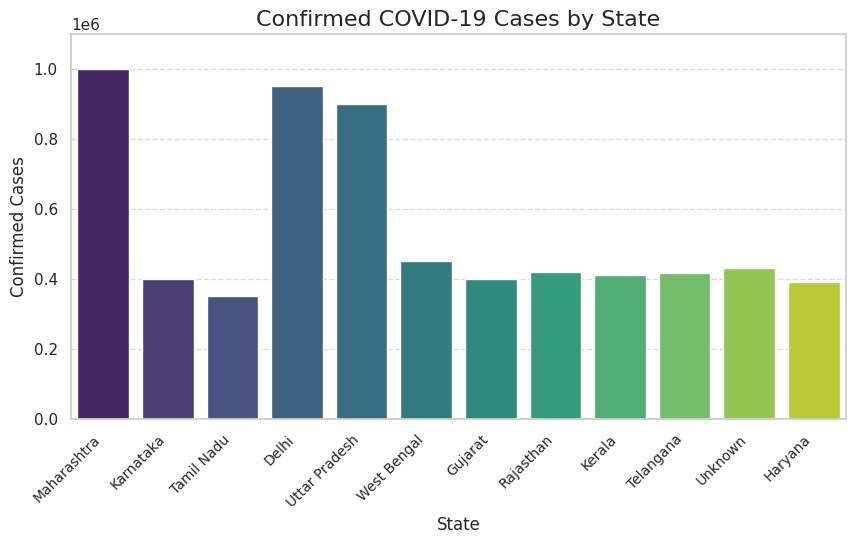

In [92]:
#Trend Analysis
##Compare Regions:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(data=df, x='State', y='Confirmed Cases', palette='viridis')

plt.title('Confirmed COVID-19 Cases by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)


plt.ylim(0, max(df['Confirmed Cases']) * 1.1)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# *Data Visualization*

<Axes: title={'center': 'Top 10 States by Confirmed Cases'}, xlabel='State'>

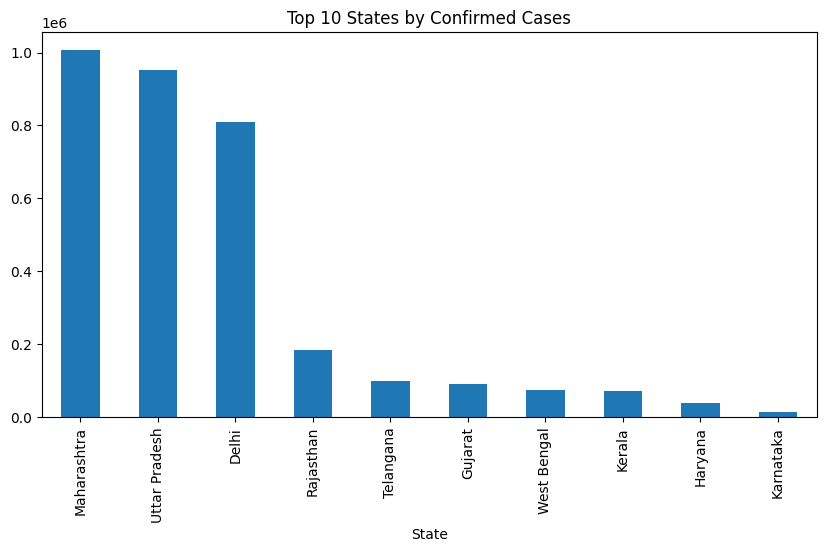

In [73]:
#Bar Chart: Top 10 states with the highest confirmed cases.

top_states = df.groupby('State')['Confirmed_Cases'].sum().nlargest(10)
top_states.plot(kind='bar', title="Top 10 States by Confirmed Cases",figsize=(10,5))

<Axes: >

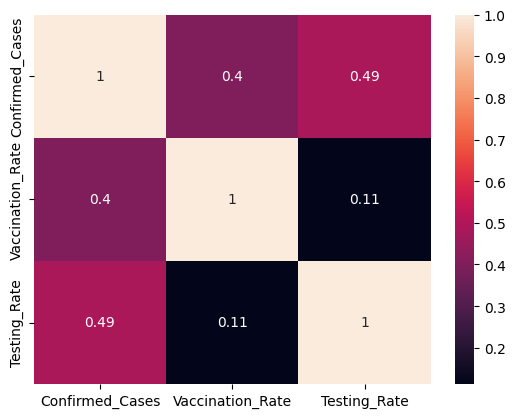

In [61]:
#Heatmap: Correlation between variables like vaccination and testing rates

import seaborn as sns
sns.heatmap(df[['Confirmed_Cases', 'Vaccination_Rate', 'Testing_Rate']].corr(), annot=True)

# *Key Insights and Findings*

<Axes: title={'center': 'Mortality Rate Over Time'}, xlabel='Date'>

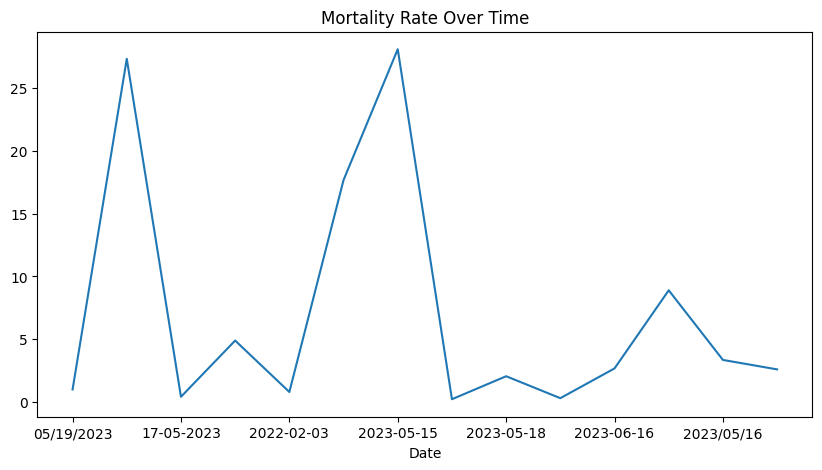

In [62]:
#Mortality and Recovery Trends
##Mortality Rate Over Time:

df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed_Cases']) * 100
mortality_trends = df.groupby('Date')['Mortality_Rate'].mean()
mortality_trends.plot(title="Mortality Rate Over Time", figsize=(10, 5))

In [17]:
#Recovery Rate Across Regions:

df['Recovery_Rate'] = (df['Recovered_Cases'] / df['Confirmed_Cases']) * 100
recovery_trends_by_state = df.groupby('State')['Recovery_Rate'].mean()
print(recovery_trends_by_state)

State
Delhi              7.722995
Gujarat           72.382159
Haryana          115.425680
Karnataka         84.592866
Kerala            71.908176
Maharashtra      203.397330
Rajasthan         89.840896
Tamil Nadu        85.451247
Telangana         63.390175
Unknown           57.215986
Uttar Pradesh      6.568363
West Bengal       72.201058
Name: Recovery_Rate, dtype: float64


<Axes: title={'center': 'Vaccination Rates vs Confirmed Cases'}, xlabel='State'>

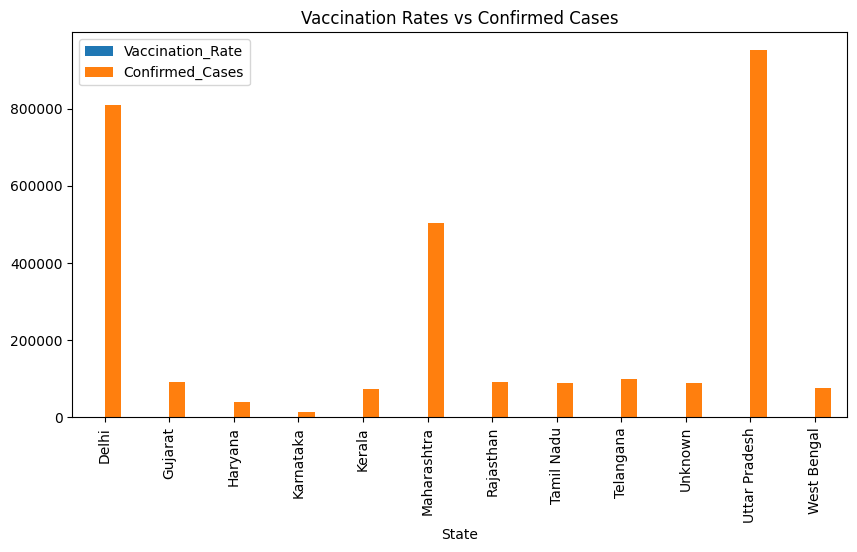

In [64]:
#Vaccine Rollout Impact
##Compare vaccination rates with case reduction:

vaccination_vs_cases = df.groupby('State')[['Vaccination_Rate', 'Confirmed_Cases']].mean()
vaccination_vs_cases.plot(kind='bar', figsize=(10, 5), title="Vaccination Rates vs Confirmed Cases")

# *Vaccination Analysis*

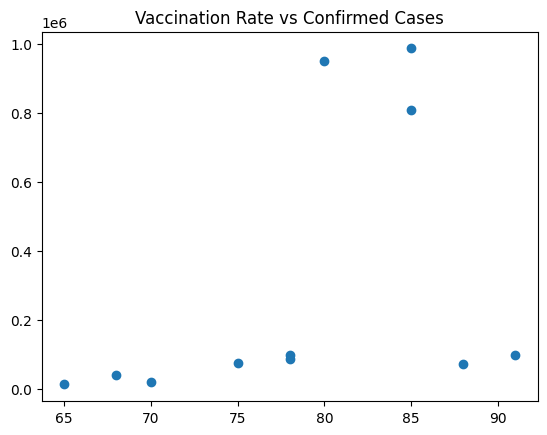

In [76]:
#Correlation with Case Reduction

import matplotlib.pyplot as plt
plt.scatter(df['Vaccination_Rate'], df['Confirmed_Cases'])
plt.title('Vaccination Rate vs Confirmed Cases')
plt.show()

In [18]:
#Top States by Vaccination

top_vaccinated_states = df.groupby('State')['Vaccination_Rate'].mean().nlargest(10)
print(top_vaccinated_states)

State
Kerala           88.0
Delhi            85.0
Rajasthan        84.5
Uttar Pradesh    80.0
Unknown          78.5
Gujarat          78.0
Tamil Nadu       78.0
Telangana        78.0
Maharashtra      77.5
West Bengal      75.0
Name: Vaccination_Rate, dtype: float64


# *Creating cleaned dataset*

In [19]:
#Save the cleaned dataset

cleaned_file_path = "cleaned_india_covid19_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved as '{cleaned_file_path}'")

Cleaned dataset saved as 'cleaned_india_covid19_dataset.csv'


# *Conclusion*

# *Key Insights from the Analysis:*


* Regional Variations: States such as Maharashtra and Uttar Pradesh report the highest confirmed cases, reflecting larger population bases and higher urban density.
* Vaccination Impact: Higher vaccination rates in states like Delhi and Kerala correlate with lower active cases and higher recovery rates, showcasing the critical role of vaccination in reducing case severity.
* Testing Effectiveness: States with higher testing rates generally demonstrate better control over active cases, indicating the importance of early detection and isolation strategies.

# *Effectiveness of Interventions:*

* Vaccination Campaigns: The vaccination rates significantly contribute to recovery and reduction in mortality rates, demonstrating the efficacy of the national vaccination drive.
* Testing Strategies: Increased testing rates have proven effective in mitigating the spread by identifying and isolating cases promptly.

# *Areas for Future Research or Improvement:*


* Data Completeness: Standardizing and ensuring the completeness of datasets will improve analytical accuracy. Missing dates and city names in this dataset limit comprehensive regional analysis.
* Policy Impact Analysis: Further research is needed to assess the impact of specific interventions, such as lockdowns or public awareness campaigns, on case dynamics.
* Focus on Smaller Regions: Detailed studies at district or city levels could uncover localized trends and resource needs.